In [1]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Define the parameters of interest and their corresponding regex patterns
parameters = [
    'total time spent by all reduce tasks',
    'total time spent by all map tasks',
    'CPU time spent',
    'Peak Map Physical memory',
    'Peak Map Virtual memory',
    'Peak Reduce Physical memory',
    'Peak Reduce Virtual memory',
    'garbage collection time elapsed'
]

patterns = {
    'total time spent by all reduce tasks': re.compile(r'Total time spent by all reduce tasks \(ms\)=(\d+)'),
    'total time spent by all map tasks': re.compile(r'Total time spent by all map tasks \(ms\)=(\d+)'),
    'CPU time spent': re.compile(r'CPU time spent \(ms\)=(\d+)'),
    'Peak Map Physical memory': re.compile(r'Peak Map Physical memory \(bytes\)=(\d+)'),
    'Peak Map Virtual memory': re.compile(r'Peak Map Virtual memory \(bytes\)=(\d+)'),
    'Peak Reduce Physical memory': re.compile(r'Peak Reduce Physical memory \(bytes\)=(\d+)'),
    'Peak Reduce Virtual memory': re.compile(r'Peak Reduce Virtual memory \(bytes\)=(\d+)'),
    'garbage collection time elapsed': re.compile(r'GC time elapsed \(ms\)=(\d+)')
}

# Function to extract performance metrics from a file using regex patterns# Function to extract performance metrics from a file using regex patterns
def extract_metrics(file_path):
    values = {'letter_count': {}, 'letter_frequency': {}}
    with open(file_path, 'r') as f:
        content = f.read()
        for param, pattern in patterns.items():
            matches = pattern.findall(content)
            if len(matches) == 2:
                values['letter_count'][param] = int(matches[0])
                values['letter_frequency'][param] = int(matches[1])
    return values

# Function to read settings from settings.txt
def read_settings(settings_path):
    with open(settings_path, 'r') as f:
        settings = {}
        for line in f:
            key, value = line.strip().split(': ')
            settings[key.strip()] = value.strip()
    return settings

# Main script to iterate through folders and specific files
output_folder = r'C:\Users\messi\Documents\GitHub\CloudComputingProject\output'

data = []

# Specify the files explicitly
files_to_process = {'Seagul_English.txt': '100KB', 'LordOfTheRings_English.txt': '3MB', 'BookReviews_5Million.txt': '3GB'}

for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)
    if os.path.isdir(folder_path):
        performance_folder = os.path.join(folder_path, 'performance')
        if os.path.exists(performance_folder):
            settings_path = os.path.join(folder_path, 'settings.txt')
            settings = read_settings(settings_path)
            for file_name, size in files_to_process.items():
                file_path = os.path.join(performance_folder, file_name)
                if os.path.exists(file_path):
                    metrics = extract_metrics(file_path)
                    for section in ['letter_count', 'letter_frequency']:
                        row = metrics[section]
                        row.update(settings)  # Merge settings into metrics
                        row['type'] = section  # Add a column to indicate the type (letter_count or letter_frequency)
                        row['size'] = size
                        data.append(row)
                else:
                    print(f"File not found: {file_path}")
        else:
            print(f"Performance folder not found: {performance_folder}")

# Convert data to pandas DataFrame
df = pd.DataFrame(data)
    
    # Extract algorithm from settings
df['algorithm'] = df['algorithm']  # Assuming this is correctly extracted
    
df

,total time spent by all reduce tasks,total time spent by all map tasks,CPU time spent,Peak Map Physical memory,Peak Map Virtual memory,Peak Reduce Physical memory,Peak Reduce Virtual memory,garbage collection time elapsed,algorithm,n_reducers,type,size
0,3009,3014,1810,330997760,3423293440,214413312,3429343232,204,Combiner,1,letter_count,100KB
1,3360,2813,1850,328986624,3422756864,210092032,3430727680,190,Combiner,1,letter_frequency,100KB
2,3520,5777,5220,512958464,3428646912,217866240,3431571456,280,Combiner,1,letter_count,3MB
3,2750,5609,5050,501264384,3425005568,211038208,3430629376,188,Combiner,1,letter_frequency,3MB
4,632357,2173839,2371460,787648512,3433963520,229253120,3437924352,10199,Combiner,1,letter_count,3GB
5,850884,2587575,2276800,788426752,3434811392,284377088,3438575616,9557,Combiner,1,letter_frequency,3GB
6,5864,3043,2420,332038144,3423805440,215302144,3430481920,316,Combiner,2,letter_count,100KB
7,6077,2858,2620,330162176,3422330880,217681920,3432480768,234,Combiner,2,letter_frequency,100KB
8,5649,5864,5930,504426496,3428069376,216350720,3435438080,302,Combiner,2,letter_count,3MB
9,5700,5842,6190,527335424,3427266560,215867392,3430961152,309,Combiner,2,letter_frequency,3MB


C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

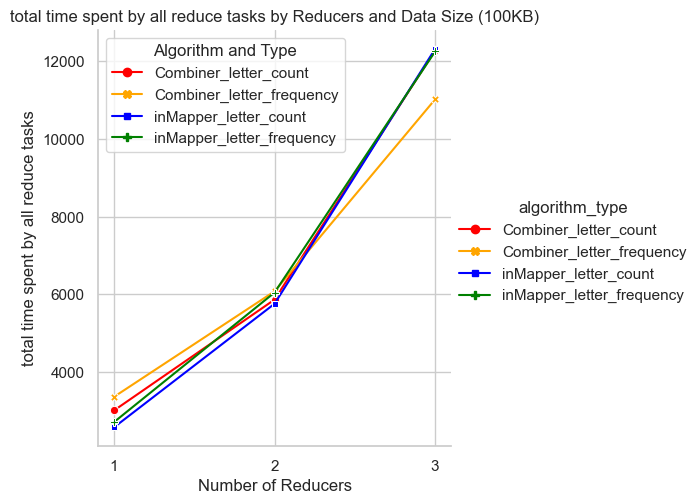

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

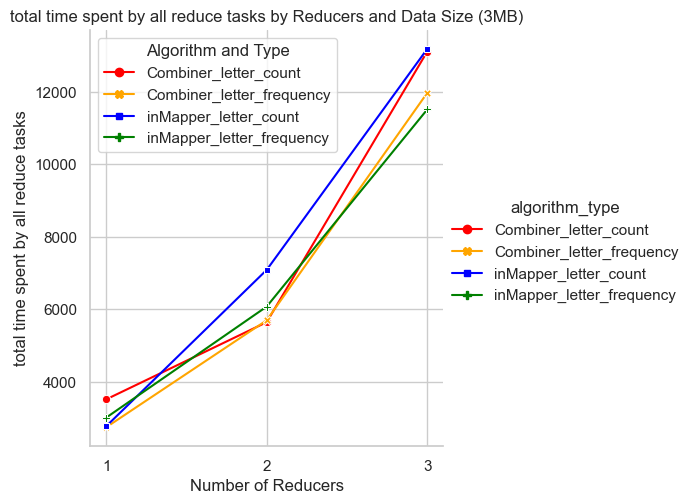

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

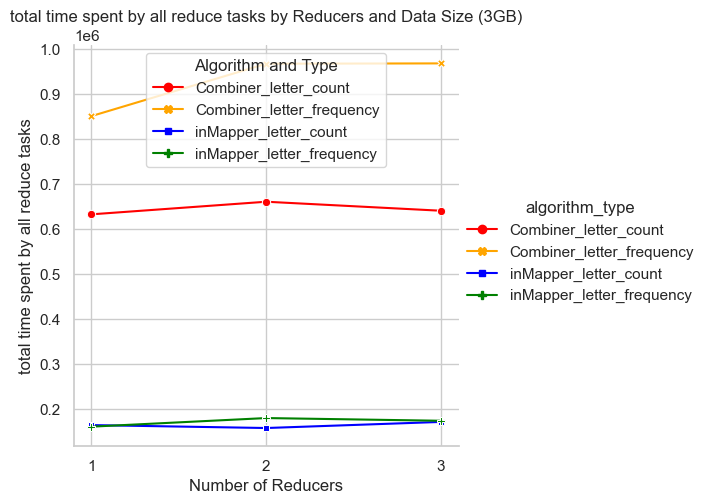

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

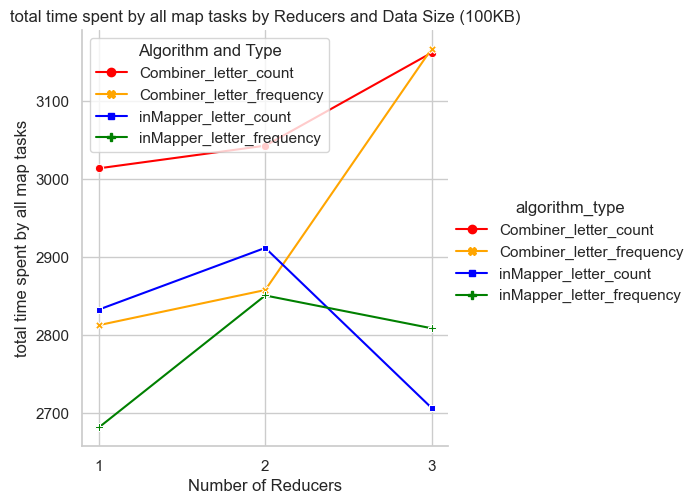

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

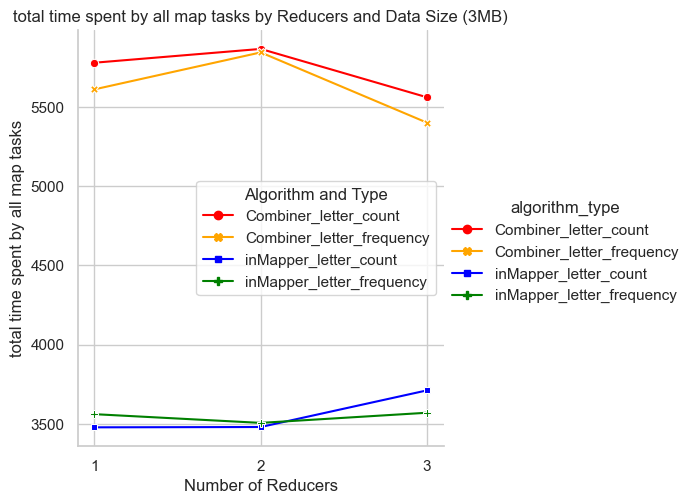

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

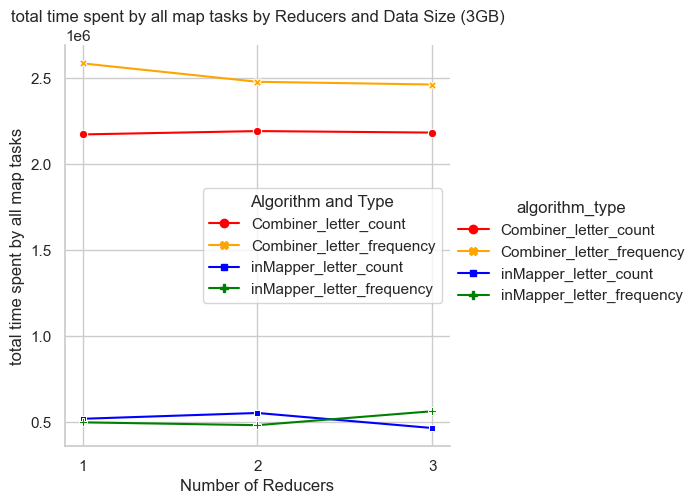

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

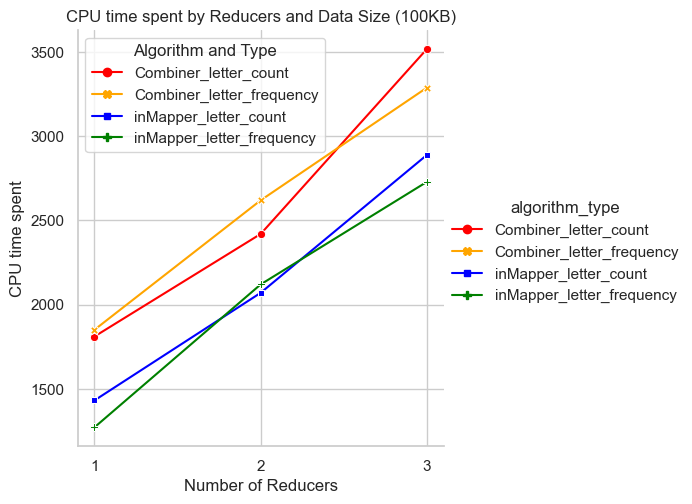

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

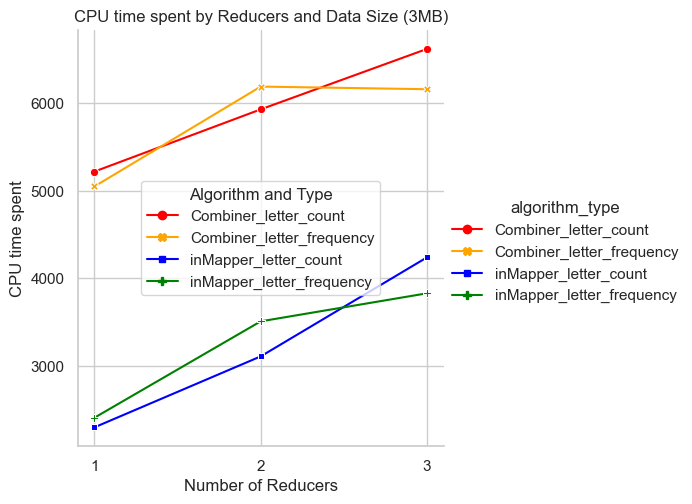

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

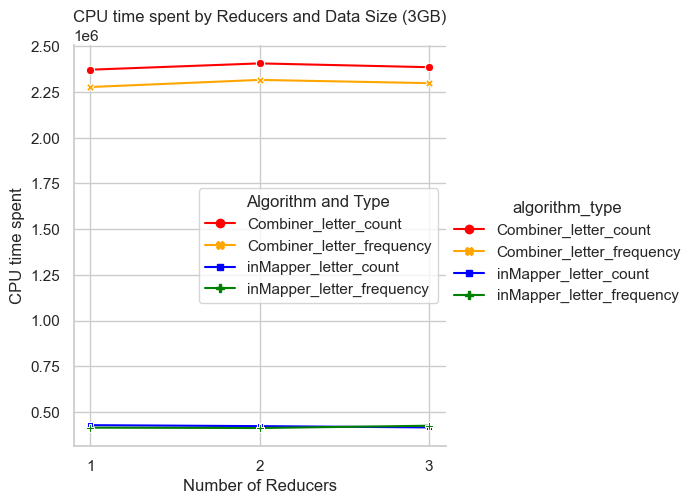

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

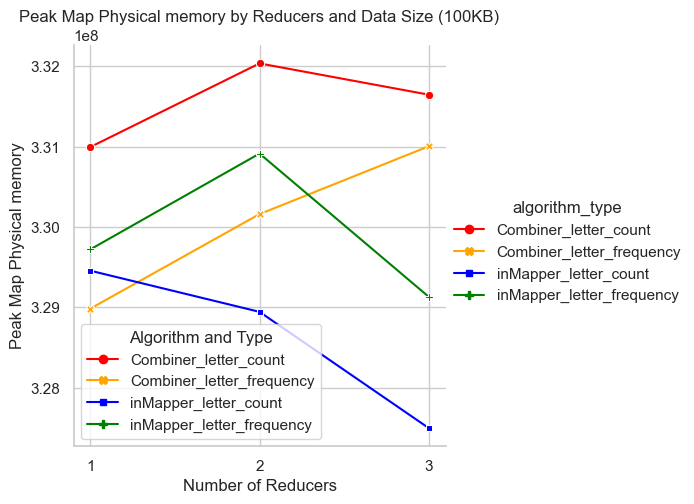

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

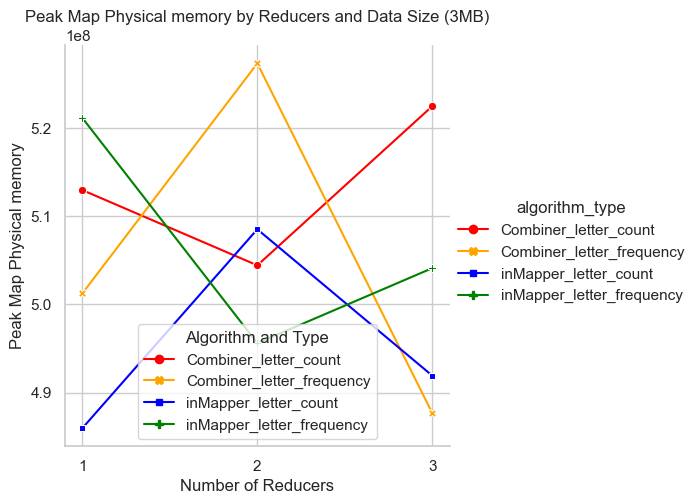

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

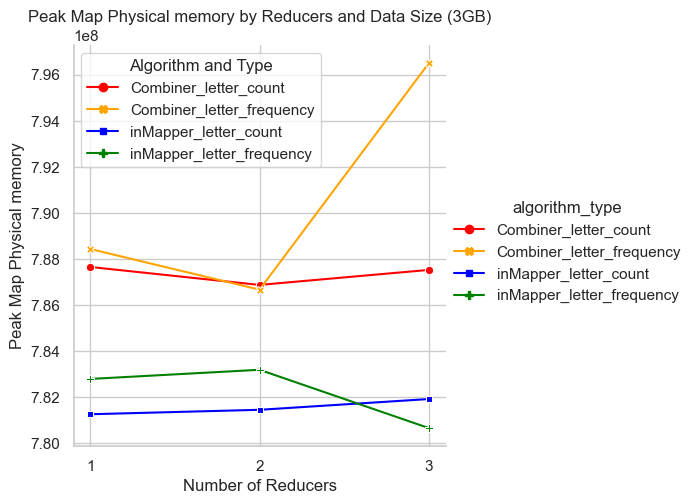

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

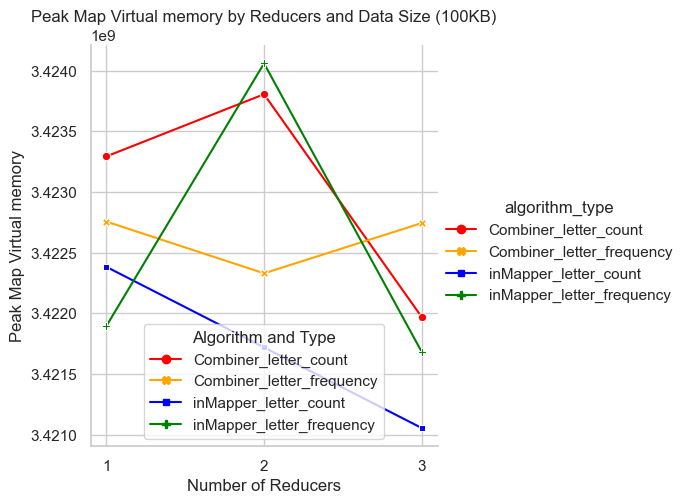

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

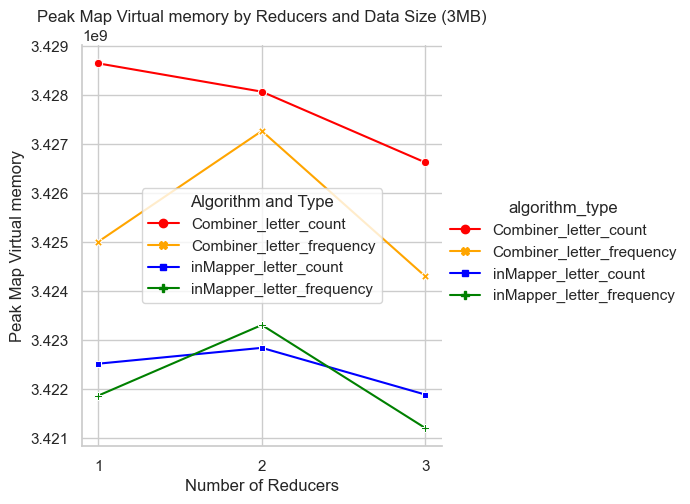

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

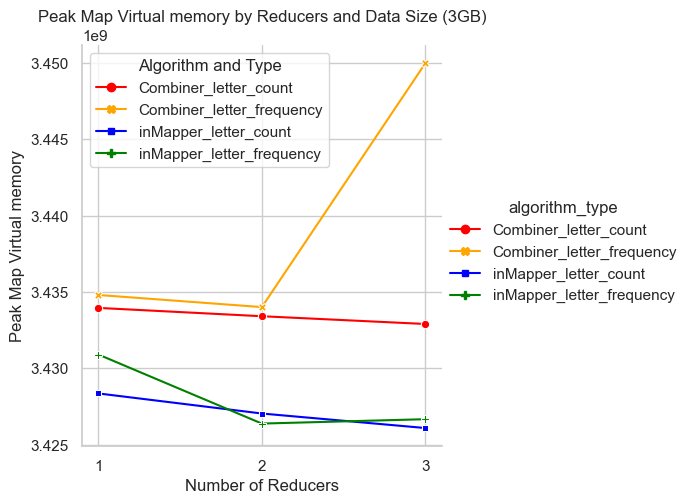

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

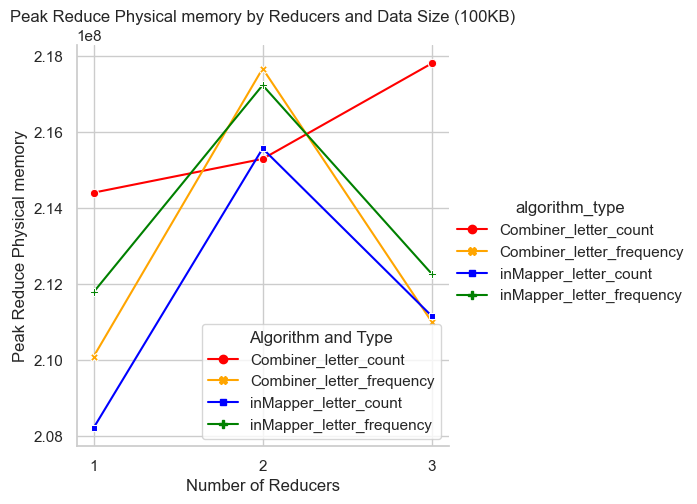

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

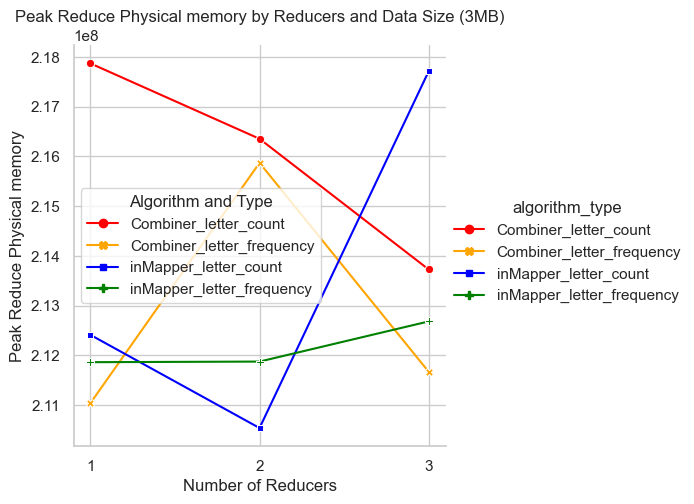

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

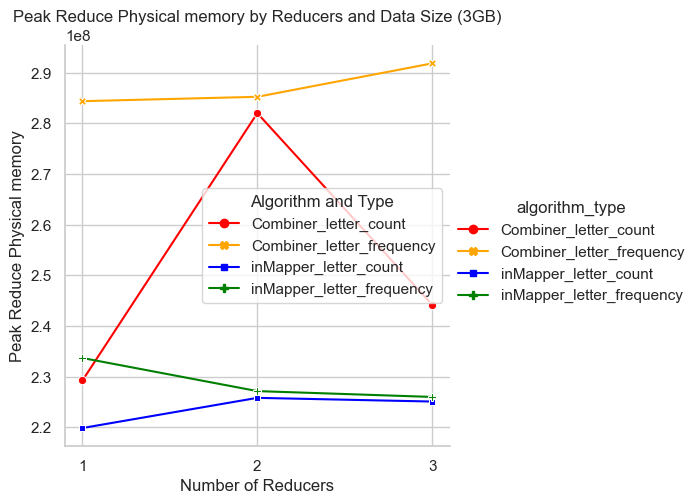

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

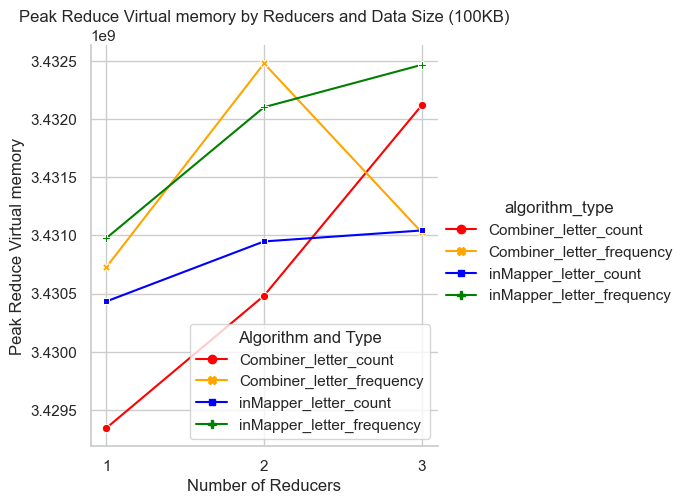

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

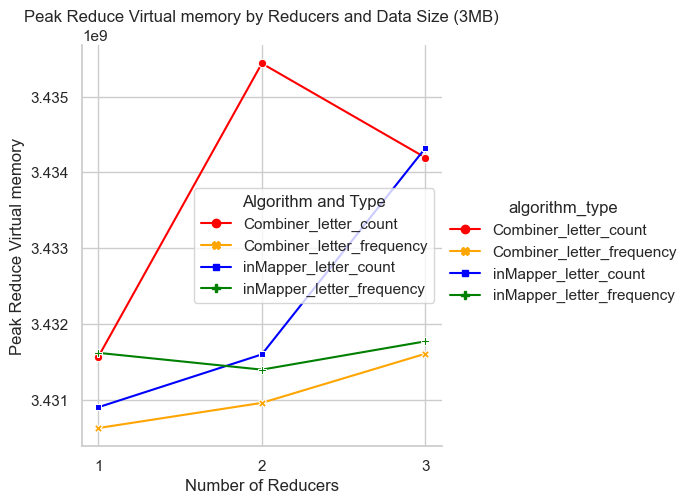

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

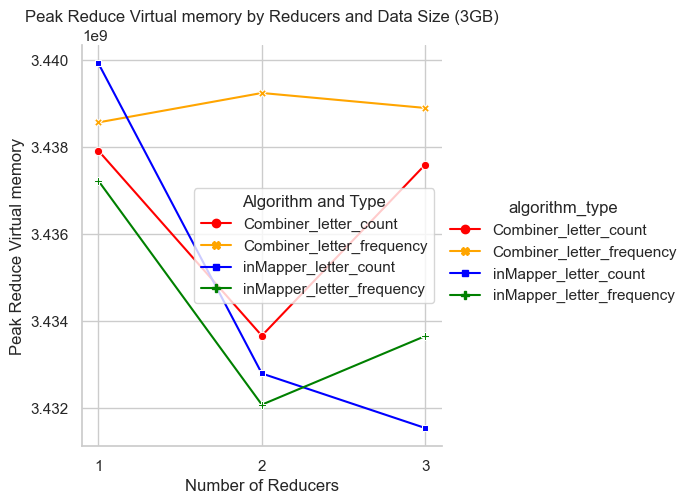

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

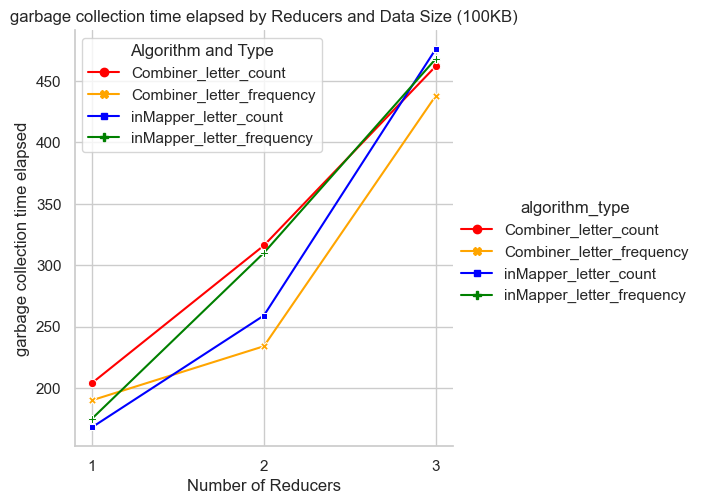

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

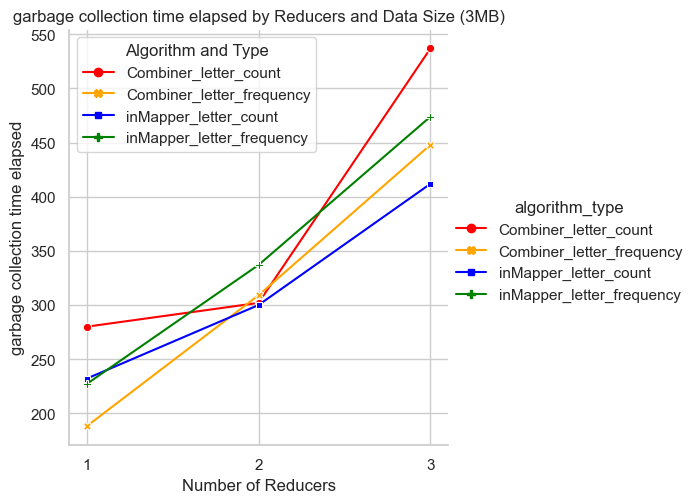

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

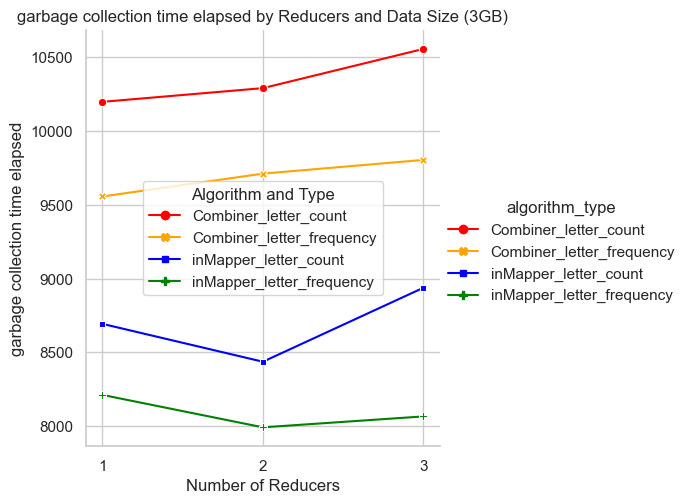

In [57]:
# Function to plot a specific metric
def plot_metric(metric_name):
    # Filter data for the metric and the specified data sizes
    data_sizes = ['100KB', '3MB', '3GB']

    for size in data_sizes:
        metrics_filtered = df[df['size'] == size].copy()

        # Define plot aesthetics
        sns.set(style='whitegrid')

        # Custom palette to differentiate all four combinations
        custom_palette = {
            'Combiner_letter_count': 'red',
            'Combiner_letter_frequency': 'orange',
            'inMapper_letter_count': 'blue',
            'inMapper_letter_frequency': 'green'
        }

        # Create a new column for the combination of algorithm and type
        metrics_filtered.loc[:, 'algorithm_type'] = metrics_filtered['algorithm'] + '_' + metrics_filtered['type']

        # Plot using seaborn's relplot
        plt.figure(figsize=(10, 6))
        plot = sns.relplot(x='n_reducers', y=metric_name, hue='algorithm_type', style='algorithm_type',
                           kind='line', data=metrics_filtered, palette=custom_palette, markers=True, dashes=False)

        # Customize labels and title
        plt.title(f'{metric_name} by Reducers and Data Size ({size})')
        plt.xlabel('Number of Reducers')
        plt.ylabel(metric_name)

        # Show legend
        plt.legend(title='Algorithm and Type')
        plt.rcParams['figure.constrained_layout.use'] = True        
        # Show plot
        plt.show()

# List of metrics to plot
metrics_to_plot = [
    'total time spent by all reduce tasks',
    'total time spent by all map tasks',
    'CPU time spent',
    'Peak Map Physical memory',
    'Peak Map Virtual memory',
    'Peak Reduce Physical memory',
    'Peak Reduce Virtual memory',
    'garbage collection time elapsed'
]

# Plot each metric
for metric in metrics_to_plot:
    plot_metric(metric)

C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\messi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


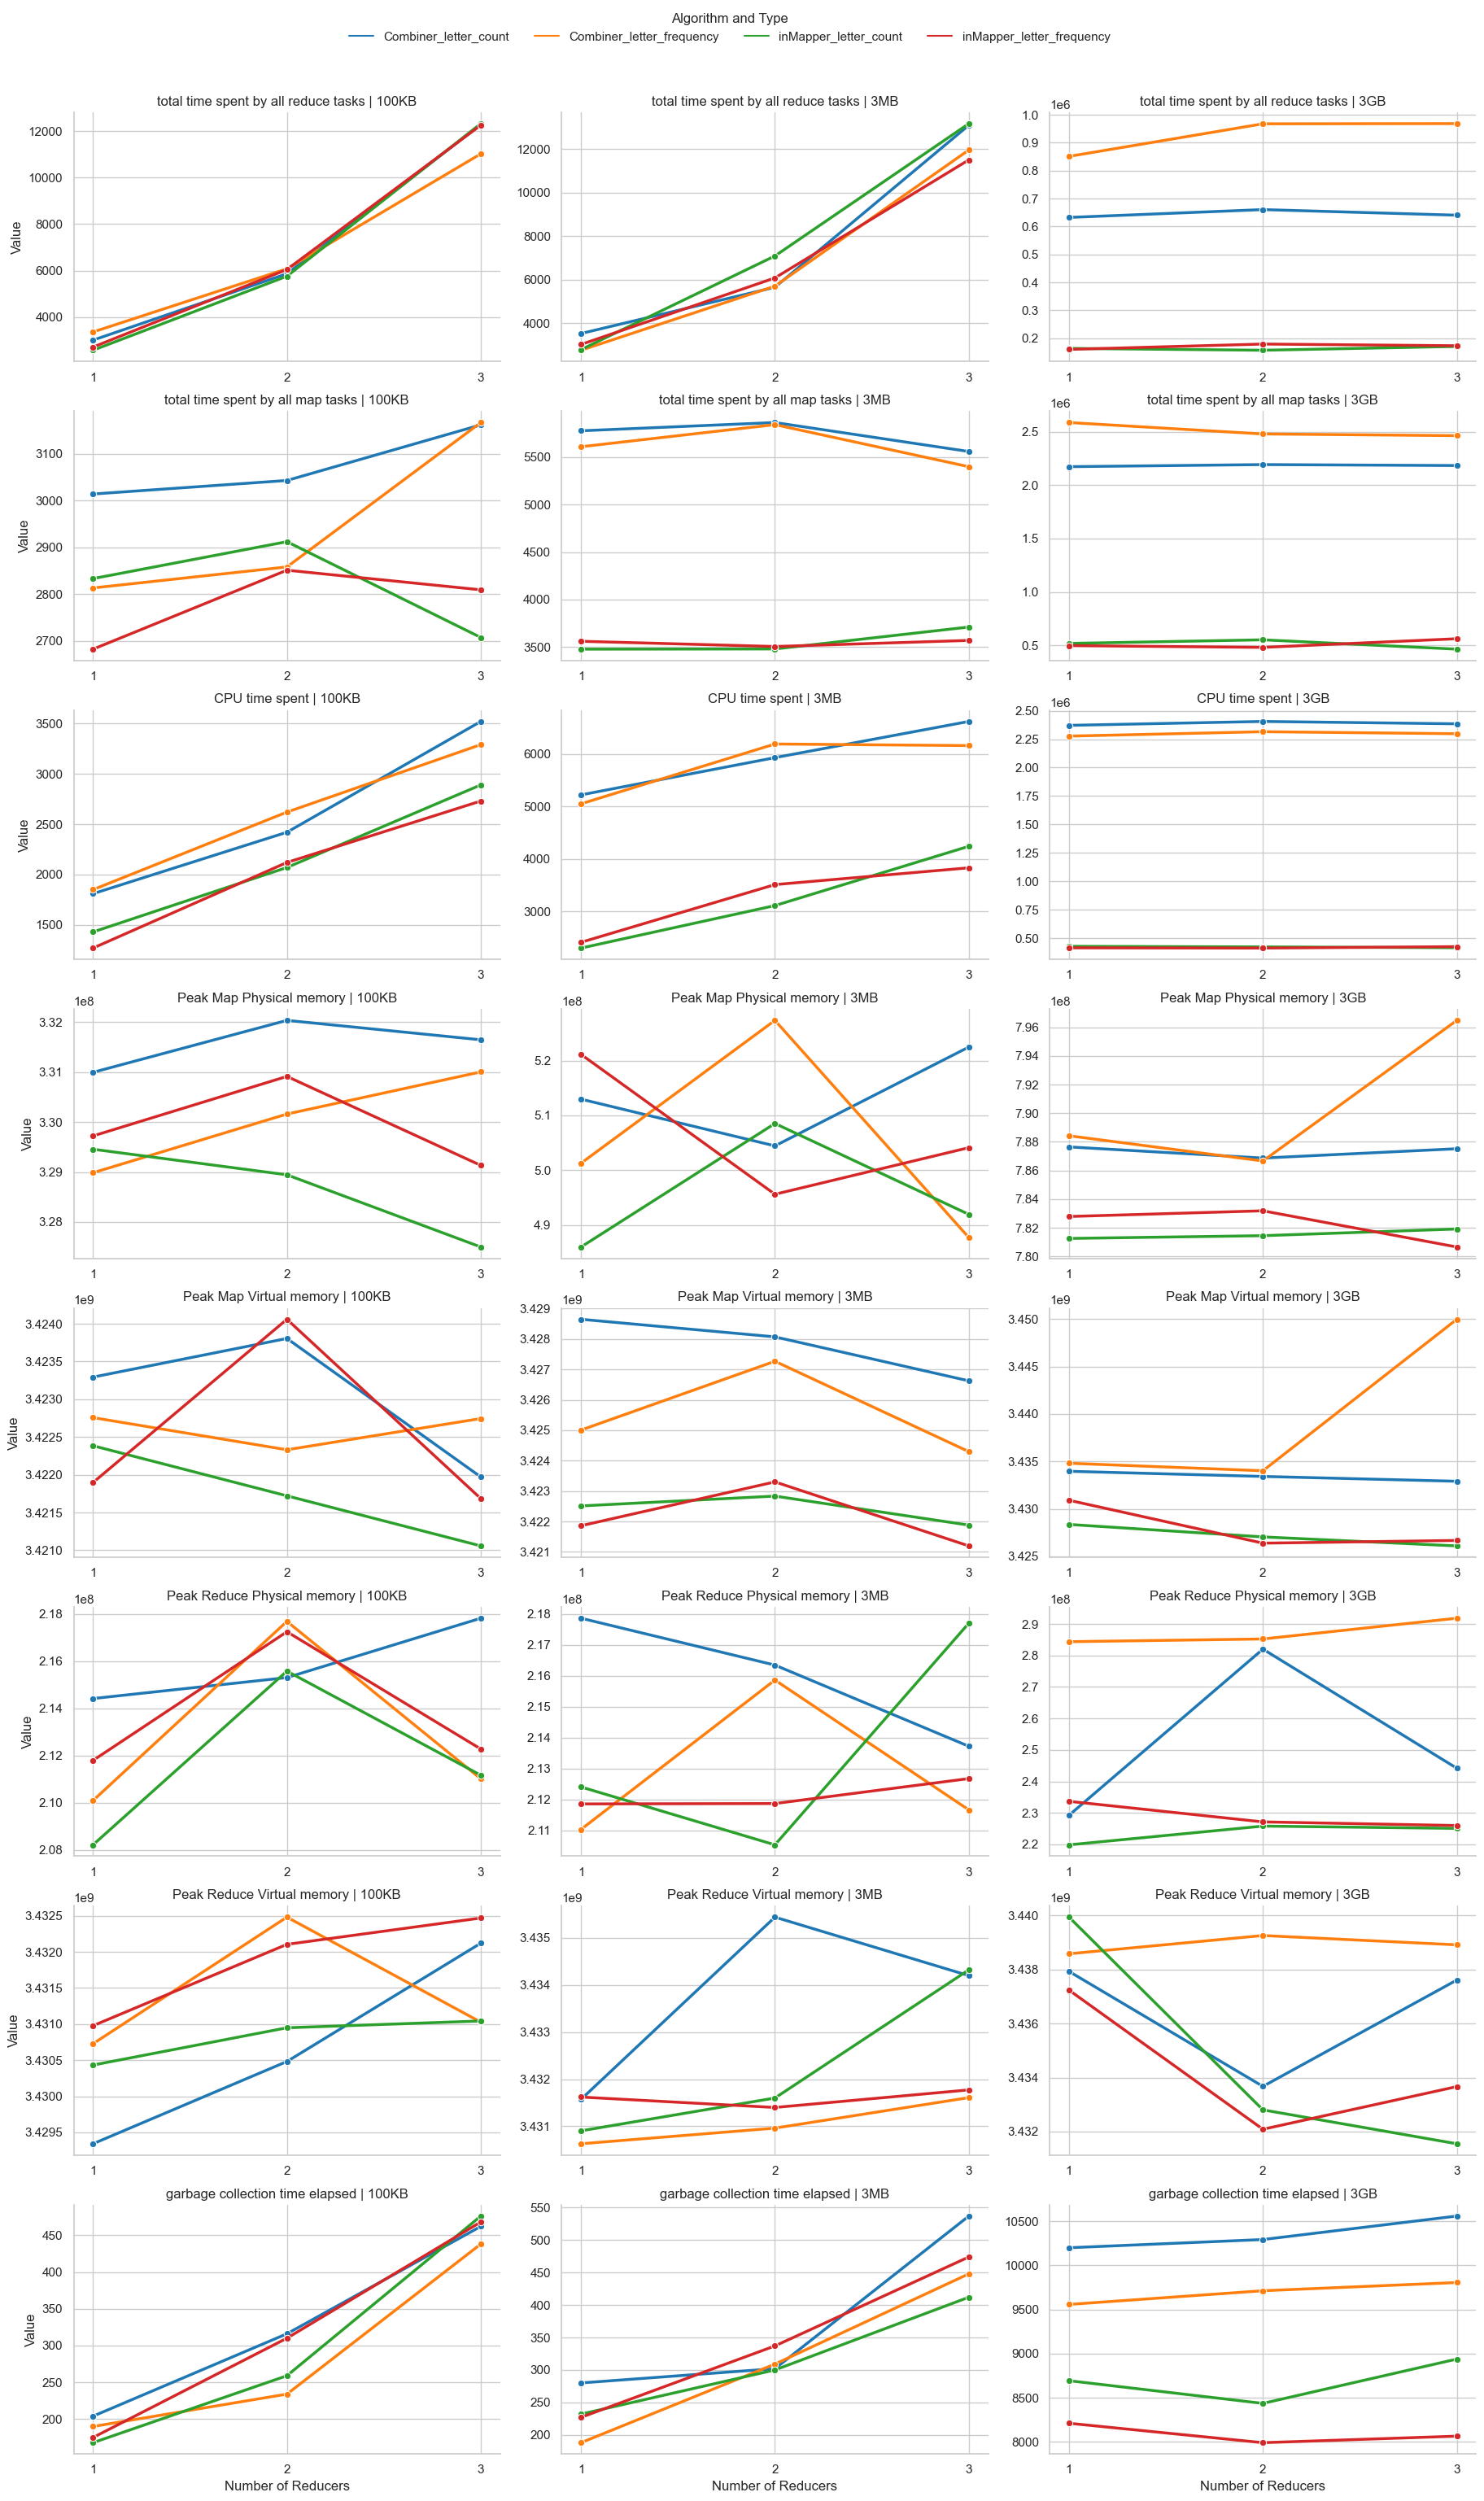

In [59]:
# Melt the DataFrame
df_melted = df.melt(id_vars=['size', 'algorithm', 'type', 'n_reducers'], var_name='param', value_name='value')

# Add a new column for algorithm_type
df_melted['Algorithm and Type'] = df_melted['algorithm'] + '_' + df_melted['type']

# Define plot aesthetics
sns.set(style='whitegrid')

# Generate the FacetGrid using relplot
g = sns.relplot(x='n_reducers', y='value', hue='Algorithm and Type', col='size', row='param',
                kind='line', marker='o', facet_kws={'sharey': False, 'sharex': False},
                data=df_melted, height=4, aspect=1.5, palette='tab10', linewidth=2.5)

# Customize the legend and titles (if needed)
g.set_axis_labels('Number of Reducers', 'Value')
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Adjust layout for main title and legend
g.fig.subplots_adjust(top=0.92, right=0.9)  # Adjust top and right margin

# Move the legend to the top right
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.45, 0.96), ncol=len(df.columns), borderaxespad=0.)

plt.show()